## **Importing Libraries**

In [325]:
import requests
from google.colab.patches import cv2_imshow
import cv2
from PIL import Image 
import os

## **BaggageAI Class**

In [326]:
class BaggageAI():

  def view_img(self, path):
    img = cv2.imread(img_path)
    cv2_imshow(img)
    print(img.shape)
    return img

  def crop(self, start_row, end_row, start_col, end_col, img_path):
    img = cv2.imread(img_path)
    img_crop = img[start_row:end_row,start_col:end_col]
    print(img.shape)
    print(img_crop.shape)
    cv2_imshow(img_crop)
    return img_crop

  def resize(self, height, width, img):
    img_resize = cv2.resize(img,(width,height))
    cv2_imshow(img_resize)
    print(img_resize.shape)
    return img_resize

  def rotate(self, angle, img):
    h,w,c = img.shape
    center = (h/2,w/2)
    rotation_matrix = cv2.getRotationMatrix2D(center,-angle,1)
    img_rotated = cv2.warpAffine(img, rotation_matrix, (w,h))
    cv2_imshow(img_rotated)
    print(img_rotated.shape)
    return img_rotated

  def saving_img(self, filename, img):
    cv2.imwrite(filename,img)
    path = "/content/"+ filename 
    return path

  def remove_bg(self, path, imageName):
    response = requests.post(
      'https://api.remove.bg/v1.0/removebg',
      files={'image_file': open(path, 'rb')},
      data={'size': 'auto'},
      headers={'X-Api-Key': 'gbVfJCqewm1Nin4qgaFLRKkc'},
    )
    if response.status_code == requests.codes.ok:
      with open(imageName, 'wb') as out:
        out.write(response.content)
    else:
      print("Error:", response.status_code, response.text)
  
  def threat_to_bag(self, bg_path, threat_path, outputName , x_cor, y_cor):
    threat = Image.open(threat_path, 'r')
    threat_cv = cv2.imread(threat_path) 

    bg = Image.open(bg_path, 'r')
    bg_cv = cv2.imread(bg_path)
    cv2_imshow(bg_cv)  
  
    temp = np.array(bg)
    # print(temp.shape[:2])
    height, width = temp.shape[:2]

    text_img = Image.new('RGBA', (width,height), (0, 0, 0, 0))
    text_img.paste(bg, (0,0))
    text_img.paste(threat, (x_cor,y_cor), mask=threat)
    text_img.save(outputName, format="png")
    ans = cv2.imread("/content/"+outputName)
    cv2_imshow(ans) 

## **Viewing Image**

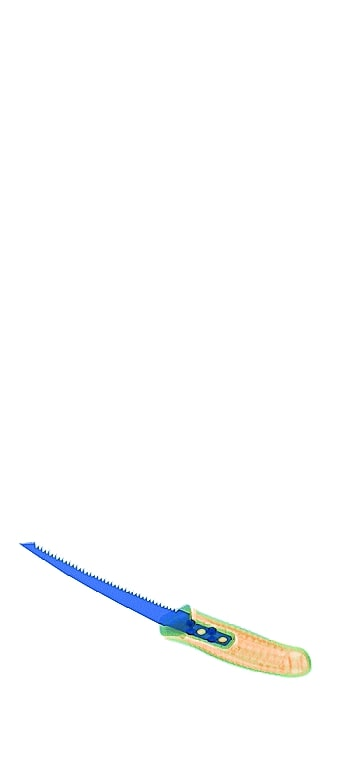

(768, 347, 3)


In [327]:
img_path = "/content/BAGGAGE_20170524_075554_80428_B.jpg"
baggage = BaggageAI()
img = baggage.view_img(path=img_path)

## **Cropping Image**

(768, 347, 3)
(268, 347, 3)


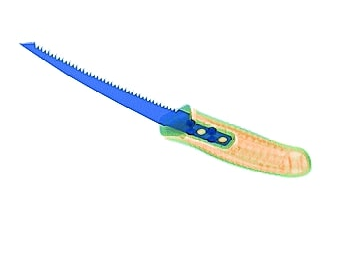

In [336]:
start_row= 500
end_row = 768
start_col = 0
end_col = 347
img_crop = baggage.crop(start_row=start_row, end_row=end_row, start_col=start_col, end_col =end_col, img_path=img_path)

## **Resizing Image**

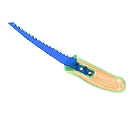

(140, 140, 3)


In [337]:
height = 140
width =140
img_resize = baggage.resize(height = height, width = width, img = img_crop)

## **Rotating Image**

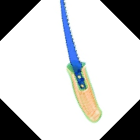

(140, 140, 3)


In [338]:
angle = 45
img_rotated =baggage.rotate(angle = angle,img =img_resize)

In [339]:
filename = "Output1.jpg"
path = baggage.saving_img(filename=filename, img = img_rotated)
print(path)

/content/Output1.jpg


## **Removing Background and Adding image in Baggage**

In [340]:
baggage.remove_bg(path=path,imageName=filename)

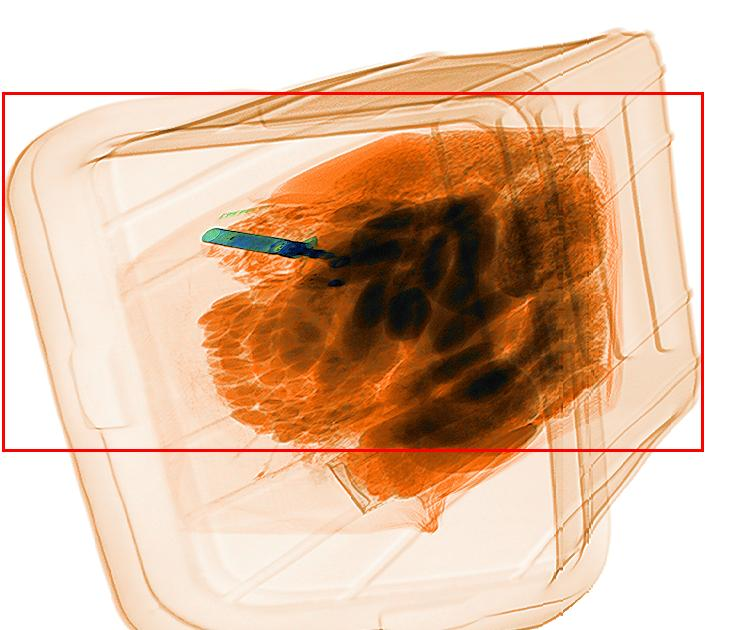

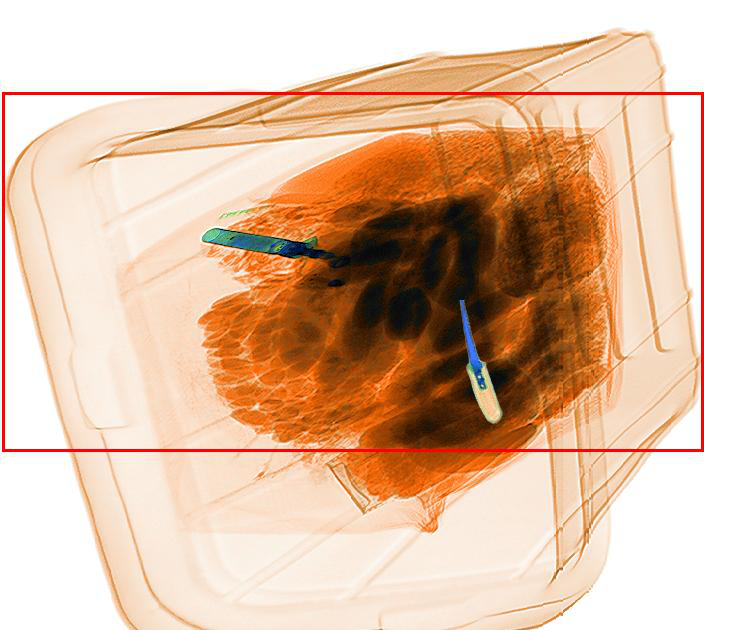

In [347]:
bg_path = "/content/S0320365070_20180821160850_L-12_5.jpg"
threat_path = path 
outputName = "ans5.png"
baggage.threat_to_bag(bg_path = bg_path, threat_path=threat_path, outputName = outputName, x_cor=400, y_cor = 300)